## Student Performance Indicator

#### Life cycle of Machine learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
6. Data Pre-Processing
7. Model Training
8. Choose best model
1) Problem statement
##### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.
* 2.1 Import Data and Required Packages
* Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading The Dataset Into Datafram

In [55]:
student_data = pd.read_csv(r'C:\Users\Kimo Store\Desktop\project\mlproject\nootbook\data\stud.csv' ,sep="\t")

#### Print The Top 5 Record

In [56]:
student_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of Data Set
 

In [57]:
student_data.shape

(1000, 8)

#### Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column


#### Checking Missing values

In [58]:
[col for col in student_data.columns if student_data[col].isna().sum()]

[]

#### There is no missing values in dataset

#### Checking for Duplicated Values

In [59]:
student_data.duplicated().sum()

0

#### There is no duplicated values 

#### Checeking For Data Type

In [60]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking for unique values in each column

In [61]:
student_data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Checking for statistics 

In [62]:
student_data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Conclusion
* From above description of numerical data, all means are very close to each other - between 66 and 69.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading meet higher = 17

#### Checking for unique values in categorical features

In [63]:
categorical_features = student_data.select_dtypes(include="O").columns

In [64]:
for col in categorical_features:
    print(f"Labels In {col} :  {student_data[col].unique()}")

Labels In gender :  ['female' 'male']
Labels In race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Labels In parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Labels In lunch :  ['standard' 'free/reduced']
Labels In test_preparation_course :  ['none' 'completed']


#### How Many Numerical And Categorical Features 

In [65]:
numerical_features = student_data.select_dtypes(exclude="O").columns

print(f"Number Of Numerical Features :- {len(numerical_features)} Name {numerical_features}")

print(f"Number Of Numerical Features :- {len(categorical_features)} Name {categorical_features}")

Number Of Numerical Features :- 3 Name Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Number Of Numerical Features :- 5 Name Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


#### Add 2 columns for total score and average score 

In [66]:
student_data['Total_score'] = student_data['math_score'] + student_data['reading_score'] + student_data['writing_score']

student_data['Average'] = student_data['Total_score'] / 3

In [67]:
student_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### How Many Students Have Full Mark In Each Exam

In [68]:
math = student_data[student_data['math_score'] == 100]['Average'].count()

reading = student_data[student_data['reading_score'] == 100]['Average'].count()

writing = student_data[student_data['writing_score'] == 100]['Average'].count()

print(f"Number Of Students With Full Mark In Math {math}")
print(f"Number Of Students With Full Mark In Reading {reading}")
print(f"Number Of Students With Full Mark In Writing {writing}")

Number Of Students With Full Mark In Math 7
Number Of Students With Full Reading In Math 17
Number Of Students With Full Writing In Math 14


#### How Many Studints Have Less Than 20 

In [71]:
math_less_20 = student_data[student_data['math_score'] <= 20]['Average'].count()

reading_less_20 = student_data[student_data['reading_score'] <= 20]['Average'].count()

writing_less_20 = student_data[student_data['writing_score'] <= 20]['Average'].count()

print(f"Number Of Students Less Than 20 In Math {math_less_20}")
print(f"Number Of Students Less Than 20 Reading  {reading_less_20}")
print(f"Number Of Students Less Than 20 Writing  {writing_less_20}")

Number Of Students Less Than 20 In Math 4
Number Of Students Less Than 20 Reading  1
Number Of Students Less Than 20 Writing  3


#### Conclusion

* From above values we get students have performed the worst in Maths
* Best performance is in reading section

## Visualization

#### Checking for Distribution And Who does perform well Female Or Male

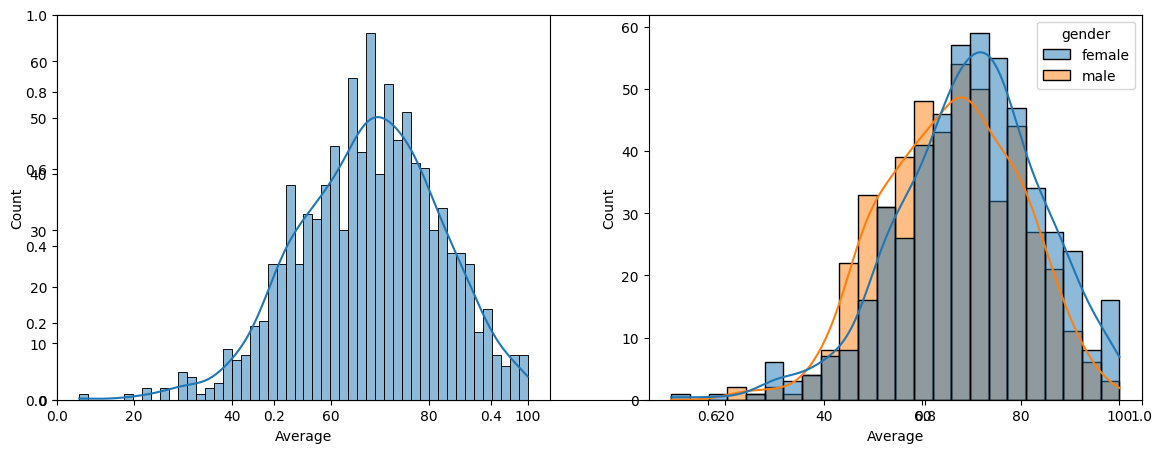

In [90]:
plt.subplots(figsize = (14,5))
plt.subplot(121)
sns.histplot(data=student_data,x = "Average", kde=True , bins = 50)
plt.subplot(122)
sns.histplot(data=student_data,x = "Average" ,kde=True , hue='gender')
plt.show()

#### Conclusion
* Female students tend to perform well than male students.

#### Visulize The Imapct Of Kind Of Lunch

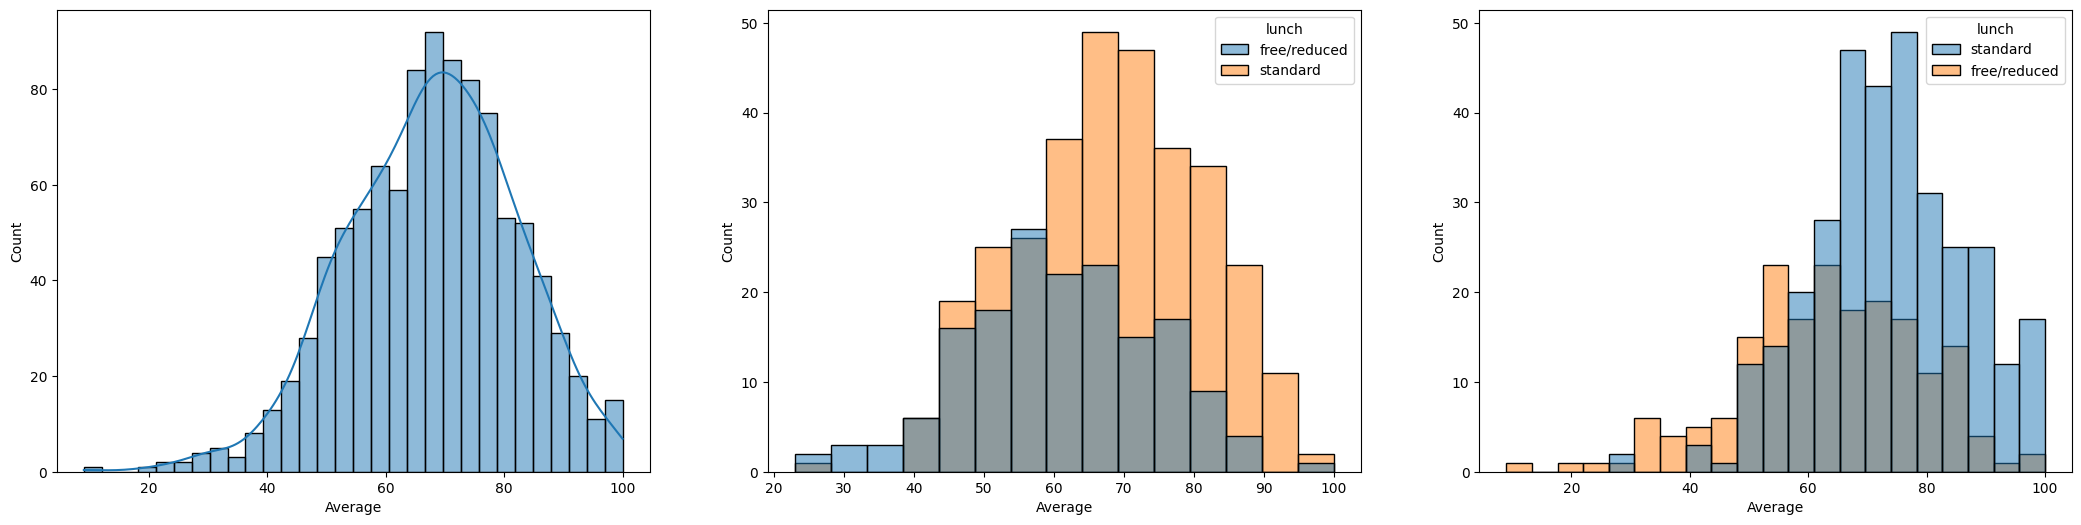

In [108]:
plt.subplots( 1,3, figsize = (26,6))
plt.subplot(131)
sns.histplot(data=student_data , x = 'Average' , bins=30 , kde=True)
plt.subplot(132)
sns.histplot(data=student_data[student_data['gender']=='male' ], x = 'Average',hue='lunch')
plt.subplot(133)
sns.histplot(data=student_data[student_data['gender'] =='female'],x='Average' ,hue='lunch' )
plt.show()

* Conclusion
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

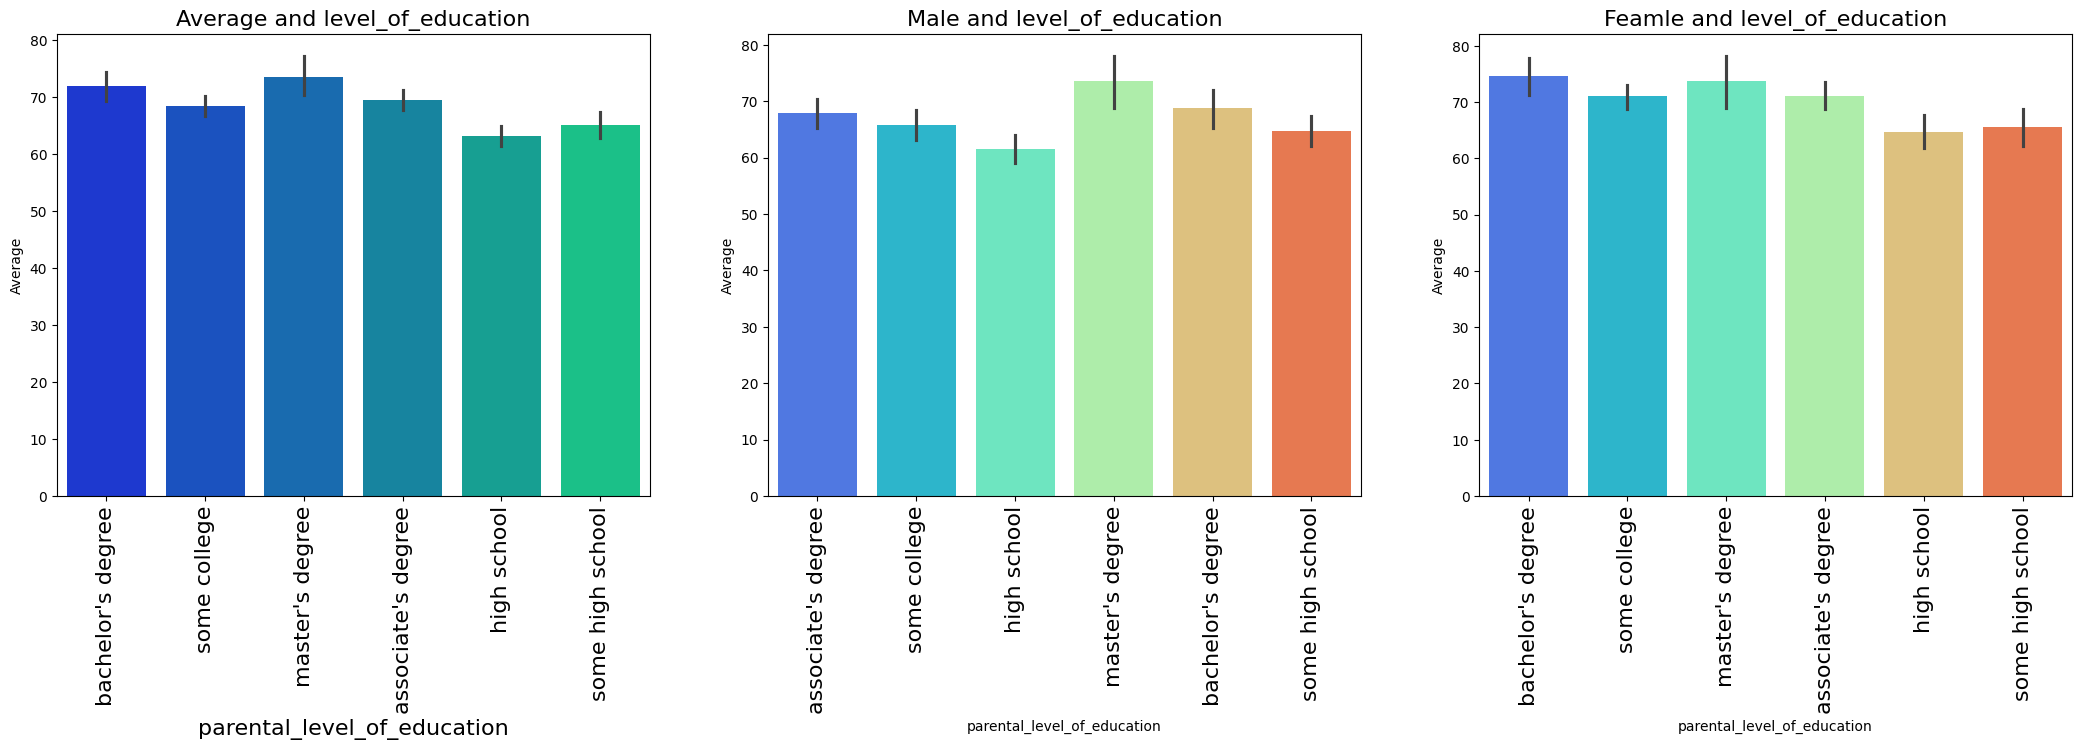

In [133]:
plt.subplots( 1,3, figsize = (26,6))
plt.subplot(131)
sns.barplot(data=student_data , x = 'parental_level_of_education' , y='Average' , palette='winter')
plt.xticks(rotation = 'vertical' , size = 16)
plt.title('Average and level_of_education' , size = 16)
plt.xlabel('parental_level_of_education' , size = 16)
plt.subplot(132)
sns.barplot(data=student_data[student_data['gender']=='male' ], y = 'Average',x='parental_level_of_education' , palette='rainbow')
plt.title('Male and level_of_education' , size = 16)
plt.xticks(rotation = 'vertical' , size = 16)
plt.subplot(133)
sns.barplot(data=student_data[student_data['gender'] =='female'],y='Average' ,x='parental_level_of_education' ,palette='rainbow')
plt.title('Feamle and level_of_education' , size = 16)
plt.xticks(rotation = 'vertical' , size = 16)
plt.show()

#### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

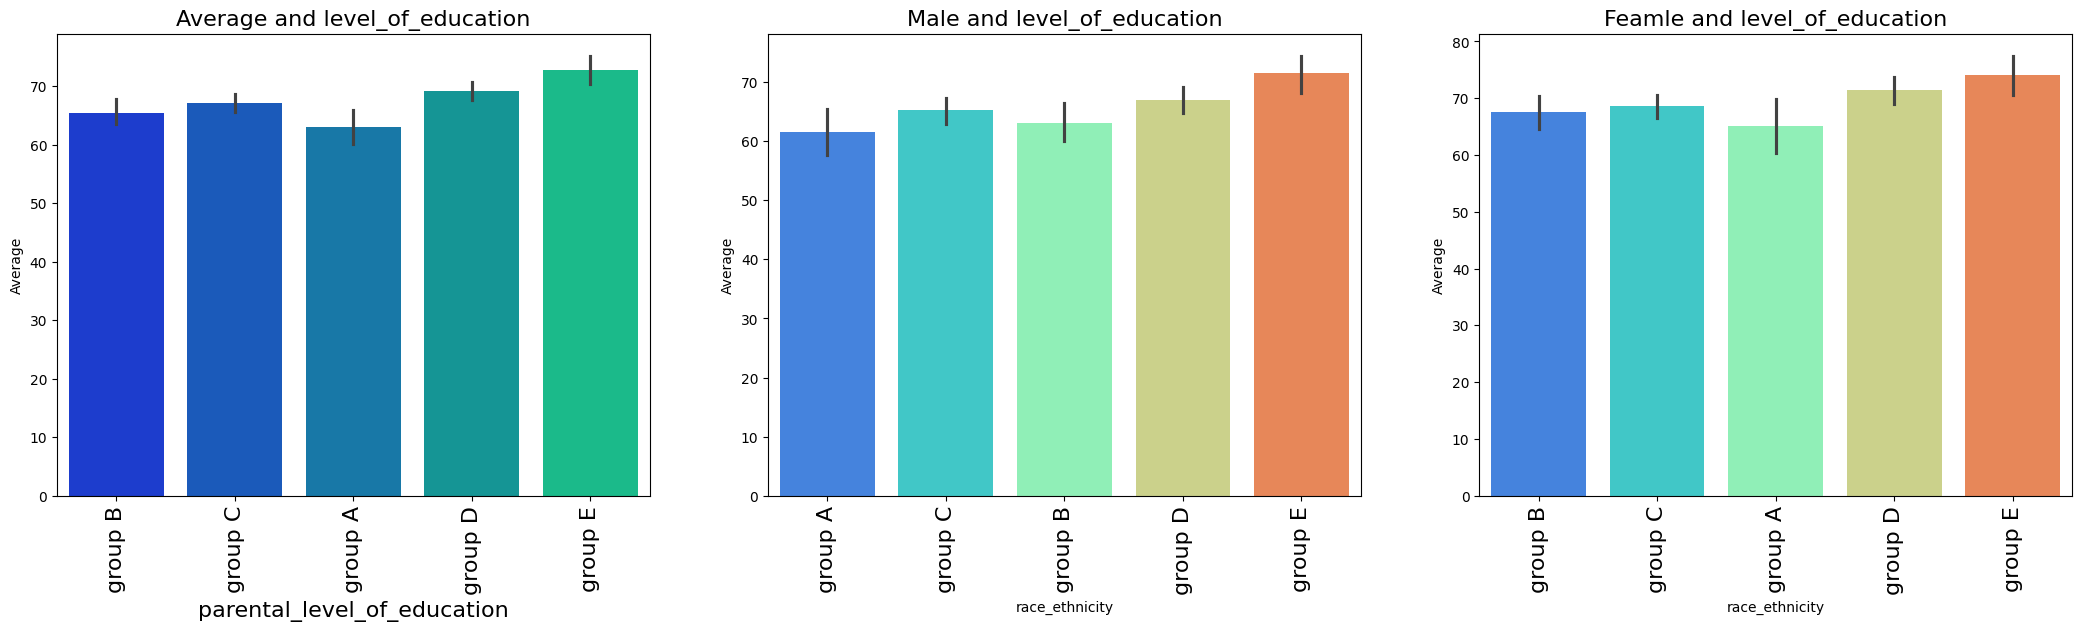

In [137]:
plt.subplots( 1,3, figsize = (26,6))
plt.subplot(131)
sns.barplot(data=student_data , x = 'race_ethnicity' , y='Average' , palette='winter')
plt.xticks(rotation = 'vertical' , size = 16)
plt.title('Average and level_of_education' , size = 16)
plt.xlabel('parental_level_of_education' , size = 16)
plt.subplot(132)
sns.barplot(data=student_data[student_data['gender']=='male' ], y = 'Average',x='race_ethnicity' , palette='rainbow')
plt.title('Male and level_of_education' , size = 16)
plt.xticks(rotation = 'vertical' , size = 16)
plt.subplot(133)
sns.barplot(data=student_data[student_data['gender'] =='female'],y='Average' ,x='race_ethnicity' ,palette='rainbow')
plt.title('Feamle and level_of_education' , size = 16)
plt.xticks(rotation = 'vertical' , size = 16)
plt.show()

#### Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

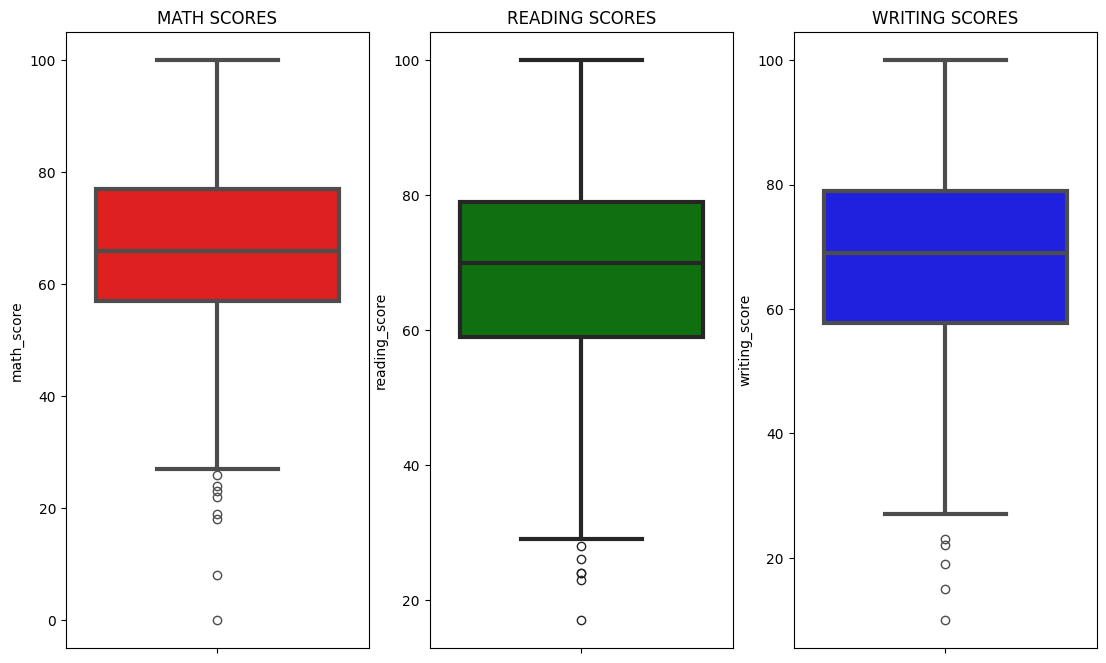

In [145]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=student_data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=student_data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=student_data,color='blue',linewidth=3)
plt.show()

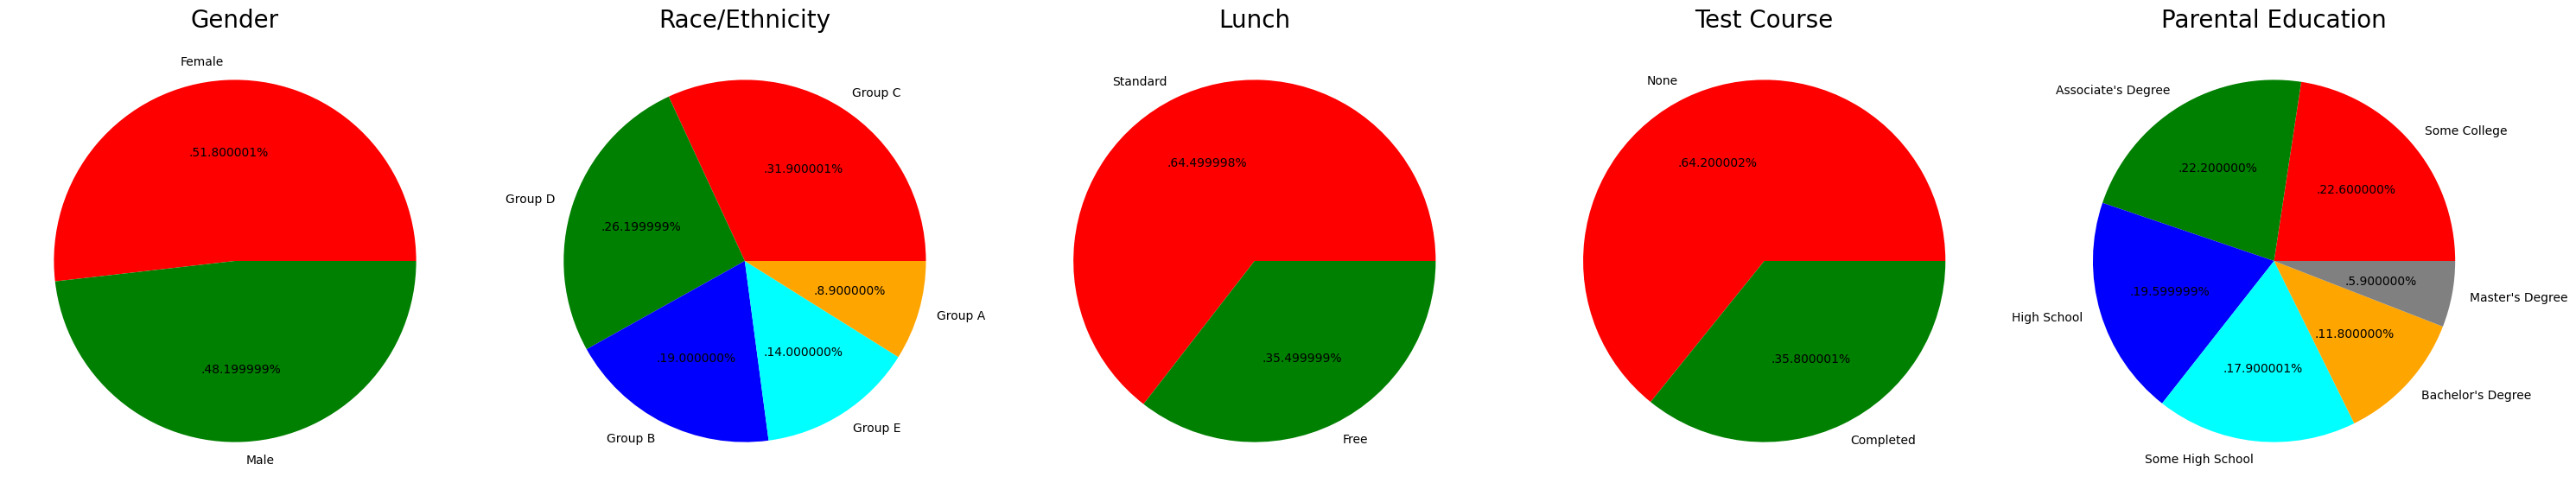

In [152]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = student_data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Conclusion
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

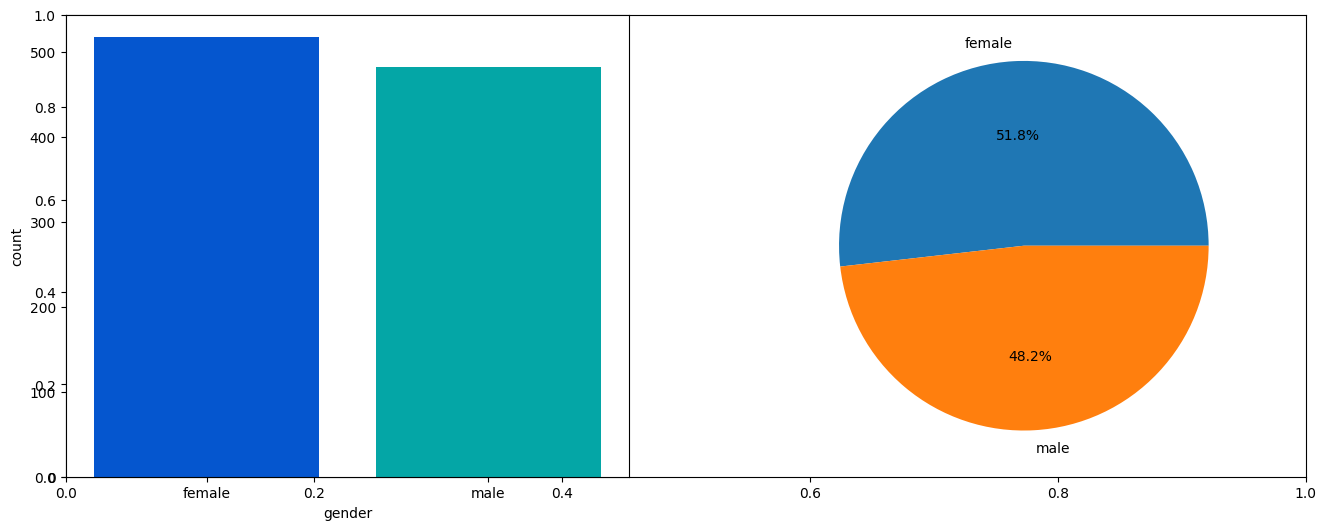

In [163]:
plt.subplots(figsize = (16,6))
plt.subplot(121)
sns.countplot(x=student_data['gender'],data=student_data,palette ='winter' , saturation=0.95 ,) 
plt.subplot(122)
plt.pie(student_data['gender'].value_counts() , labels = ['female' , 'male'] , autopct='%1.1f%%')
plt.show()



#### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

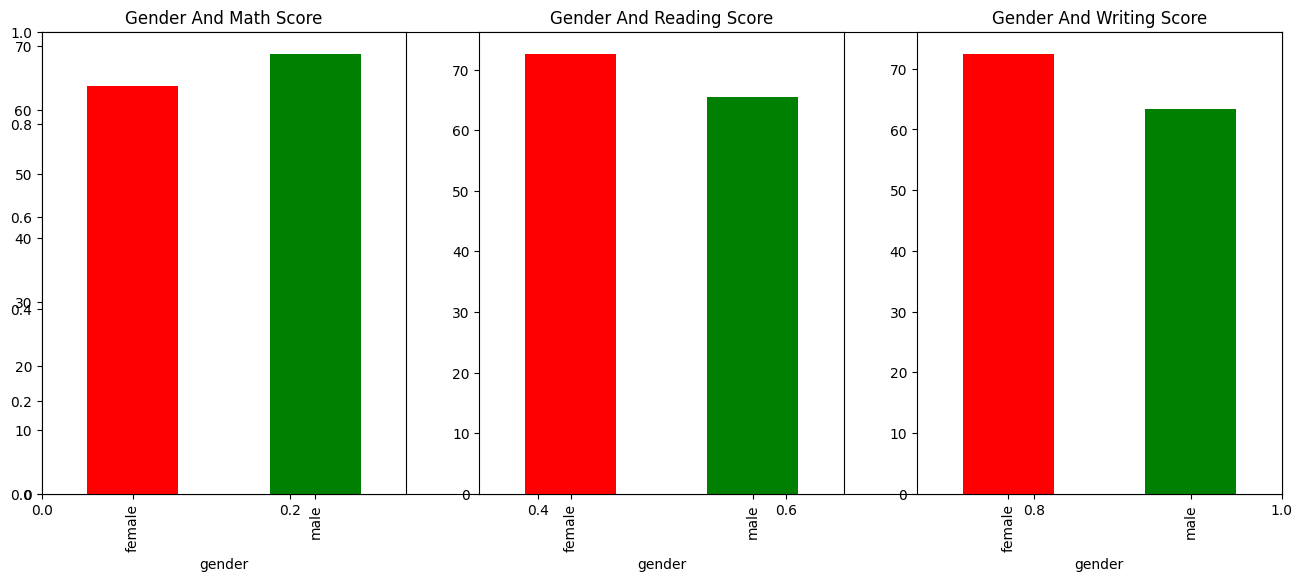

In [175]:
plt.subplots(figsize = (16,6))
plt.subplot(131)
student_data.groupby(['gender'])['math_score'].mean().plot(kind = 'bar' , color = ['red' , 'green'])
plt.title('Gender And Math Score')
plt.subplot(132)
student_data.groupby(['gender'])['reading_score'].mean().plot(kind = 'bar' , color = ['red' , 'green'])
plt.title('Gender And Reading Score')
plt.subplot(133)
student_data.groupby(['gender'])['writing_score'].mean().plot(kind = 'bar' , color = ['red' , 'green'])
plt.title('Gender And Writing Score')
plt.show()

#### Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

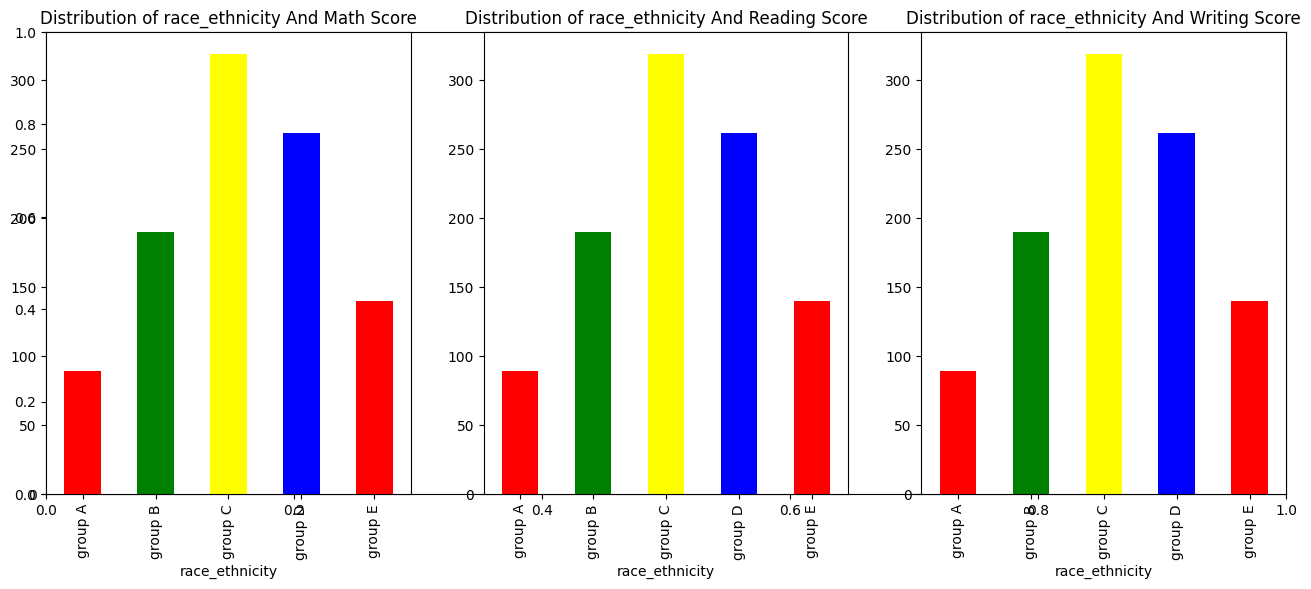

In [187]:
plt.subplots(figsize = (16,6))
plt.subplot(131)
student_data.groupby(['race_ethnicity'])['math_score'].count().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue'])
plt.title('Distribution of race_ethnicity And Math Score')
plt.subplot(132)
student_data.groupby(['race_ethnicity'])['reading_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue'])
plt.title('Distribution of race_ethnicity And Reading Score')
plt.subplot(133)
student_data.groupby(['race_ethnicity'])['writing_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue'])
plt.title('Distribution of race_ethnicity And Writing Score')

plt.show()

#### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

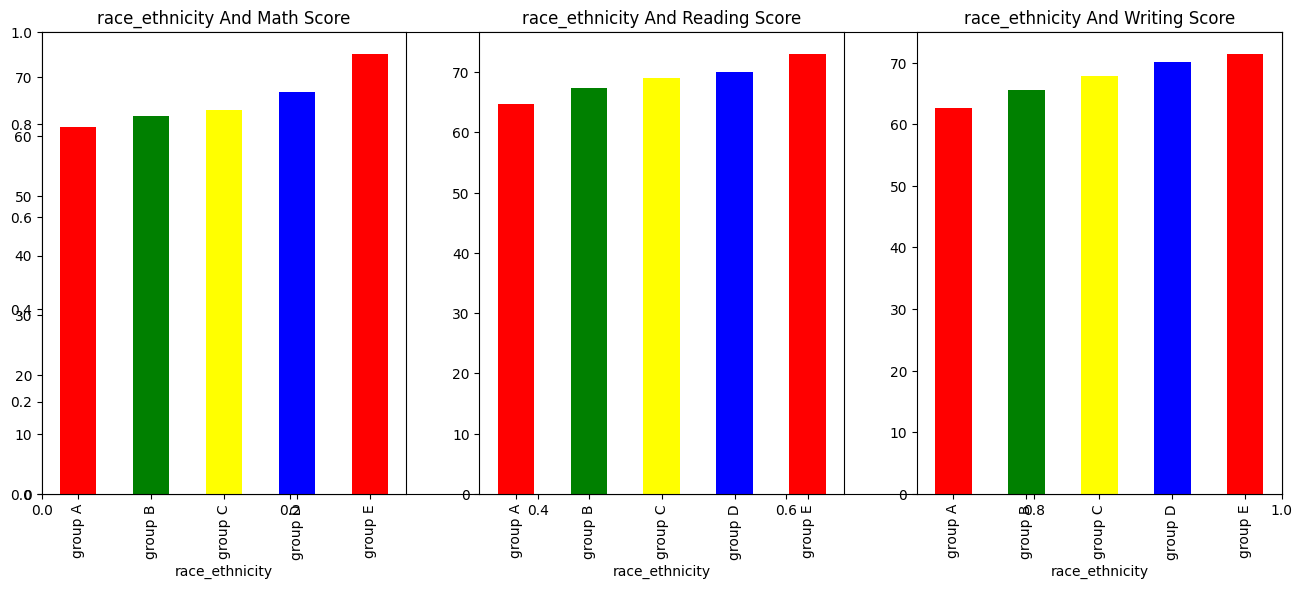

In [186]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['race_ethnicity'])['math_score'].mean().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue'])
plt.title('race_ethnicity And Math Score')
plt.subplot(132)
student_data.groupby(['race_ethnicity'])['reading_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue'])
plt.title('race_ethnicity And Reading Score')
plt.subplot(133)
student_data.groupby(['race_ethnicity'])['writing_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue'])
plt.title('race_ethnicity And Writing Score')
plt.show()

#### Conclusion
* Although Few Student in group E But Those Students Have Best Performance
* in Second Place Group D Have Good Performance as well

#### UNIVARIATE ANALYSIS ( What is the impact of educational background on student's performance ? )

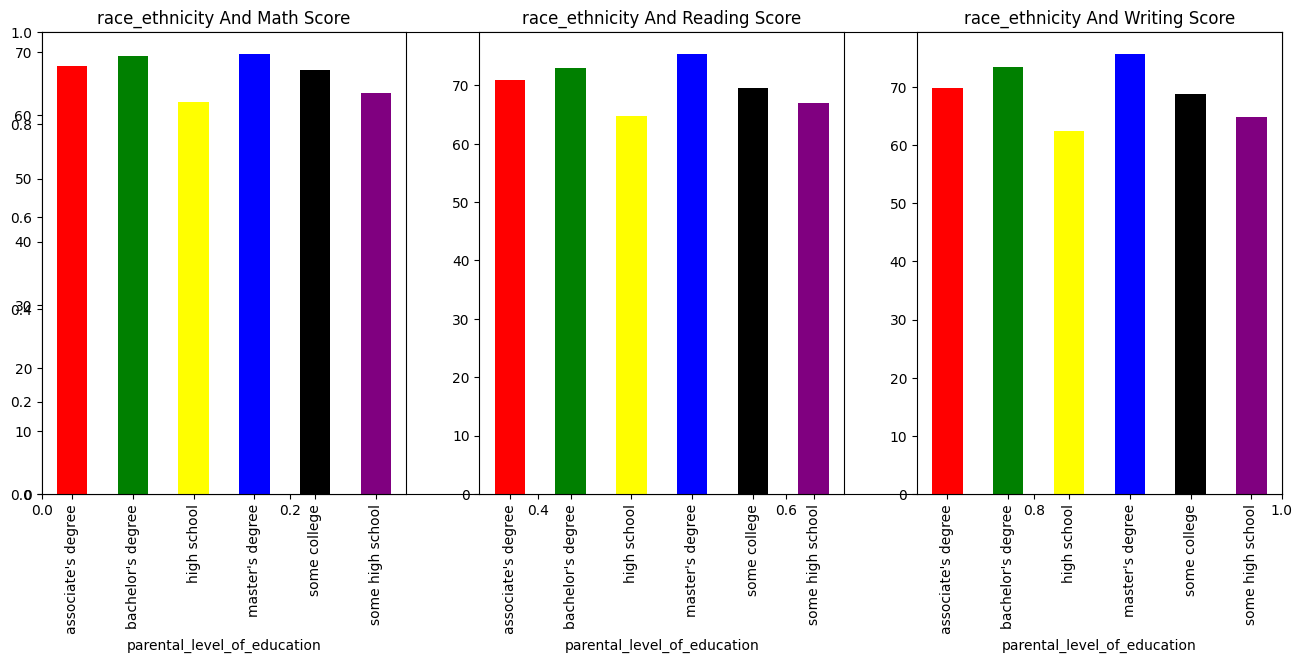

In [194]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['parental_level_of_education'])['math_score'].mean().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue' , 'black' , 'purple'])
plt.title('level_of_education And Math Score')
plt.subplot(132)
student_data.groupby(['parental_level_of_education'])['reading_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('level_of_education And Reading Score')
plt.subplot(133)
student_data.groupby(['parental_level_of_education'])['writing_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('level_of_education And Writing Score')
plt.show()

#### Conclusion
* Students Belong bachelor's degree And master's degree Have Best Performance 

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


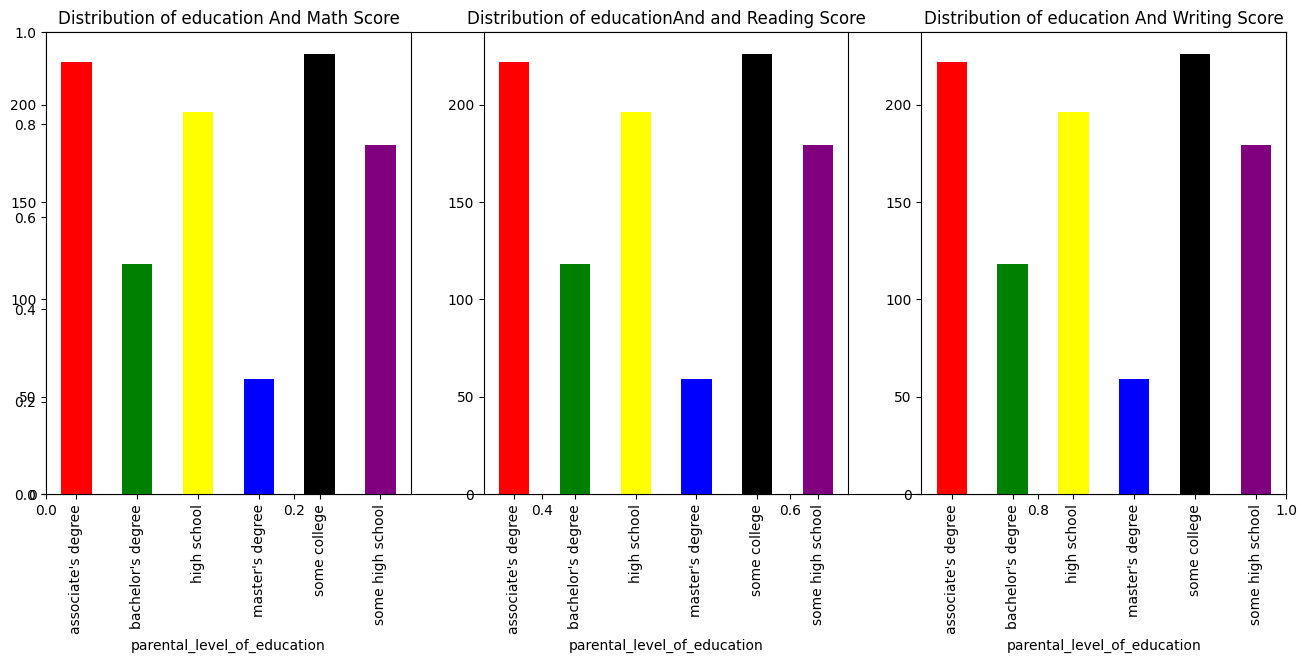

In [197]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['parental_level_of_education'])['math_score'].count().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue' , 'black' , 'purple'])
plt.title('Distribution of education And Math Score')
plt.subplot(132)
student_data.groupby(['parental_level_of_education'])['reading_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('Distribution of educationAnd and Reading Score')
plt.subplot(133)
student_data.groupby(['parental_level_of_education'])['writing_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('Distribution of education And Writing Score')
plt.show()

#### Insights
* Largest number of Student are from some college and associate's degree

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


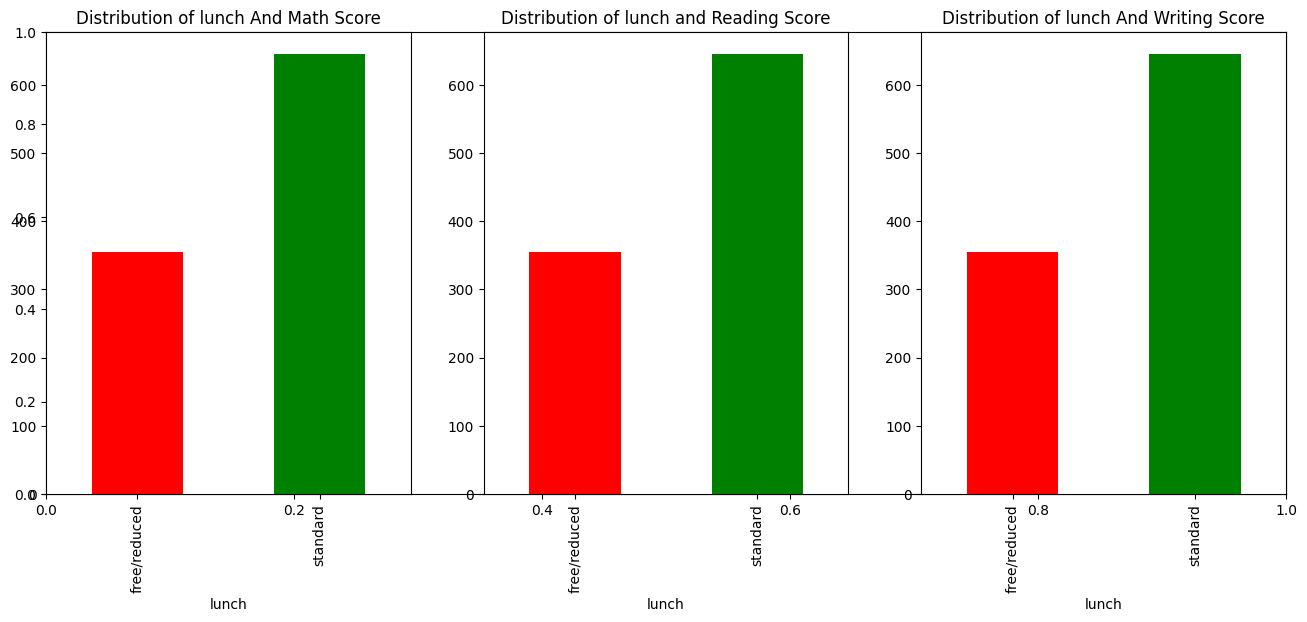

In [199]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['lunch'])['math_score'].count().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue' , 'black' , 'purple'])
plt.title('Distribution of lunch And Math Score')
plt.subplot(132)
student_data.groupby(['lunch'])['reading_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('Distribution of lunch and Reading Score')
plt.subplot(133)
student_data.groupby(['lunch'])['writing_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('Distribution of lunch And Writing Score')
plt.show()

#### Insights
* Students being served Standard lunch was more than free lunch

#### UNIVARIATE ANALYSIS ( Which type of lunch has most impact on students ? )


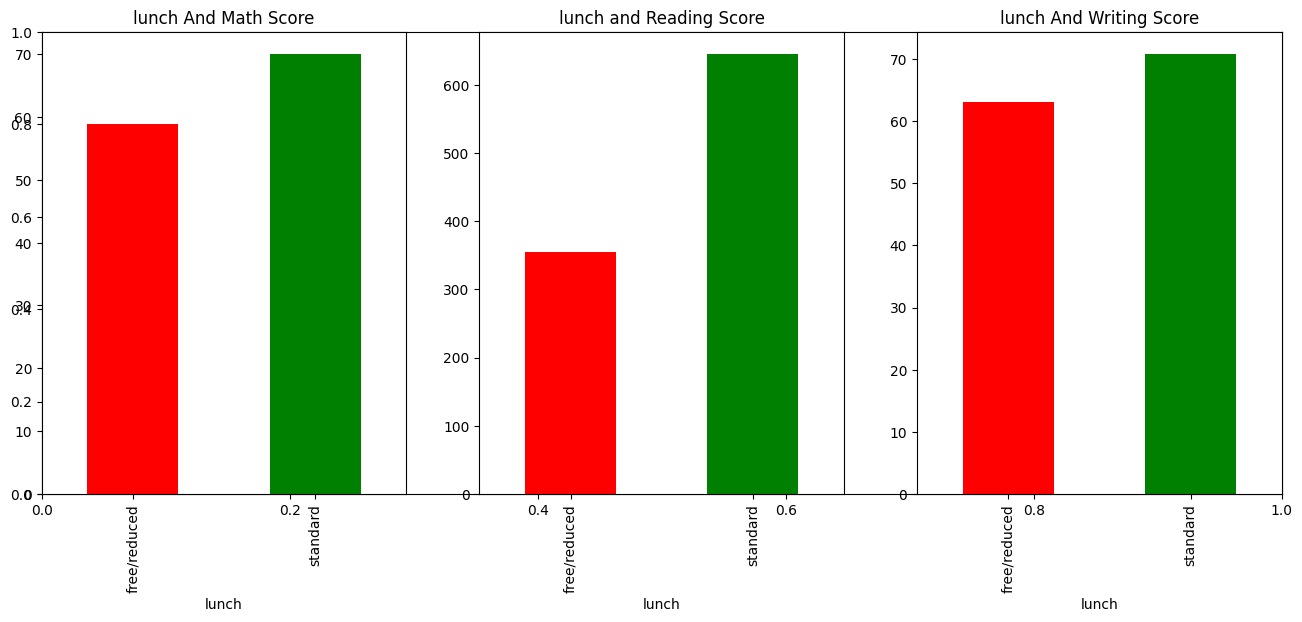

In [201]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['lunch'])['math_score'].mean().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue' , 'black' , 'purple'])
plt.title('lunch And Math Score')
plt.subplot(132)
student_data.groupby(['lunch'])['reading_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('lunch and Reading Score')
plt.subplot(133)
student_data.groupby(['lunch'])['writing_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('lunch And Writing Score')
plt.show()

#### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )


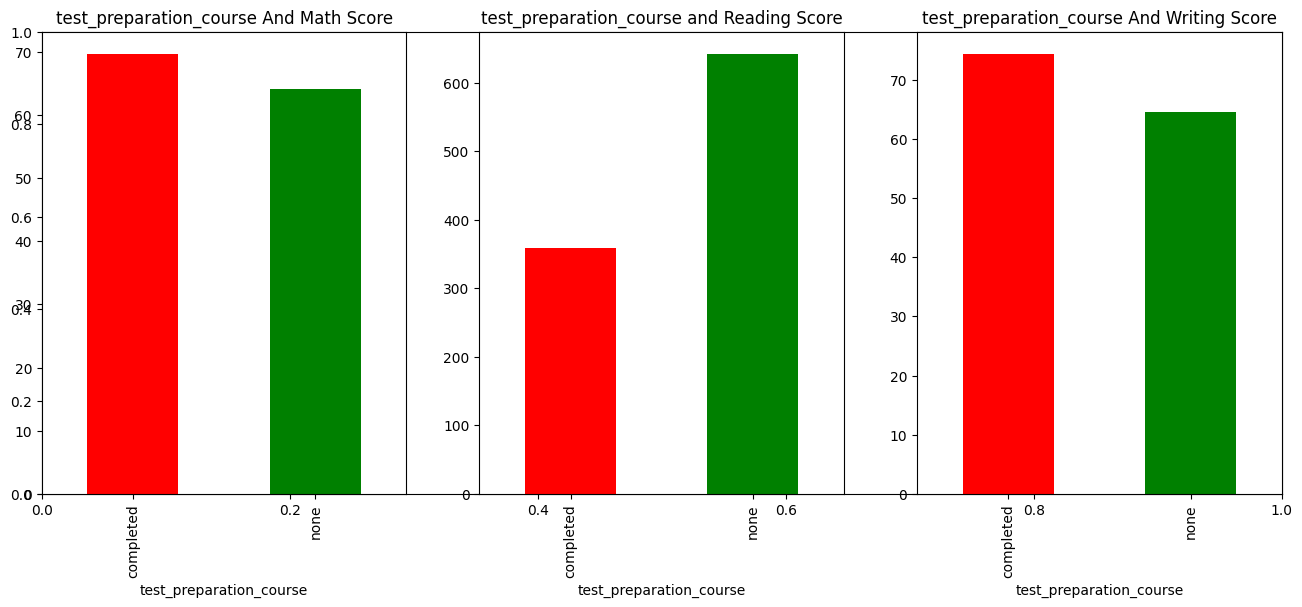

In [205]:
plt.subplots(figsize = (16,6))

plt.subplot(131)
student_data.groupby(['test_preparation_course'])['math_score'].mean().plot(kind = 'bar' , color = ['red' , 'green' , 'yellow' , 'blue' , 'black' , 'purple'])
plt.title('test_preparation_course And Math Score')
plt.subplot(132)
student_data.groupby(['test_preparation_course'])['reading_score'].count().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('test_preparation_course and Reading Score')
plt.subplot(133)
student_data.groupby(['test_preparation_course'])['writing_score'].mean().plot(kind = 'bar' , color = ['red' , 'green', 'yellow' , 'blue', 'black' , 'purple'])
plt.title('test_preparation_course And Writing Score')
plt.show()

#### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course except in reading score